<a href="https://colab.research.google.com/github/IvaroEkel/Probabilistic-Machine-Learning_Lecture/blob/main/Gaussian_Discriminant_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Iris classification with LDA and QDA + proper 2D decision boundaries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)


In [ ]:

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names
n_classes = len(class_names)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:
# Helper function to evaluate models
def evaluate_model(model, X_test, y_test, title=""):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== {title} ===")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


=== Linear Discriminant Analysis (LDA) ===
Accuracy: 0.9778
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



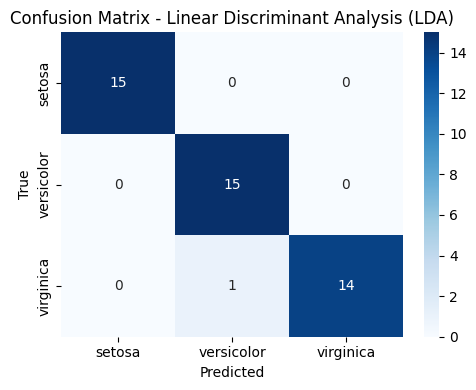

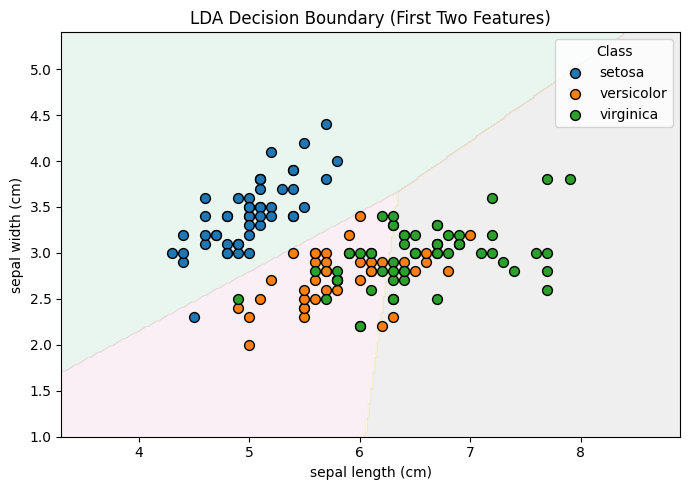

In [ ]:

# Helper function to evaluate models
def evaluate_model(model, X_test, y_test, title=""):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== {title} ===")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

# --- Linear Discriminant Analysis (LDA) ---
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
evaluate_model(lda, X_test, y_test, title="Linear Discriminant Analysis (LDA)")

# --- LDA: 2D Decision Boundary using first two features ---
def plot_lda_decision_boundary():
    X_2D = X[:, :2]
    lda_2d = LinearDiscriminantAnalysis()
    lda_2d.fit(X_2D, y)

    x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
    y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = lda_2d.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, preds, alpha=0.3, cmap="Pastel2")

    for i, label in enumerate(np.unique(y)):
        plt.scatter(X_2D[y == label, 0], X_2D[y == label, 1],
                    label=class_names[label], edgecolor='k', s=50)

    plt.title("LDA Decision Boundary (First Two Features)")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend(title="Class")
    plt.tight_layout()
    plt.show()

plot_lda_decision_boundary()





=== Quadratic Discriminant Analysis (QDA) ===
Accuracy: 0.9778
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



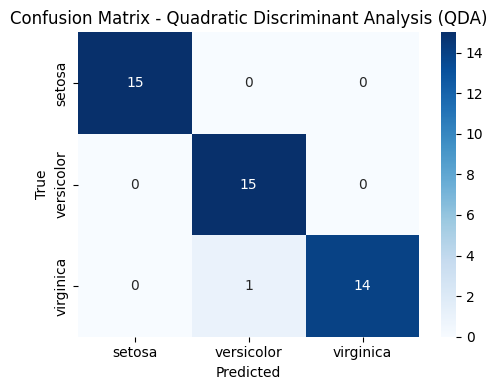

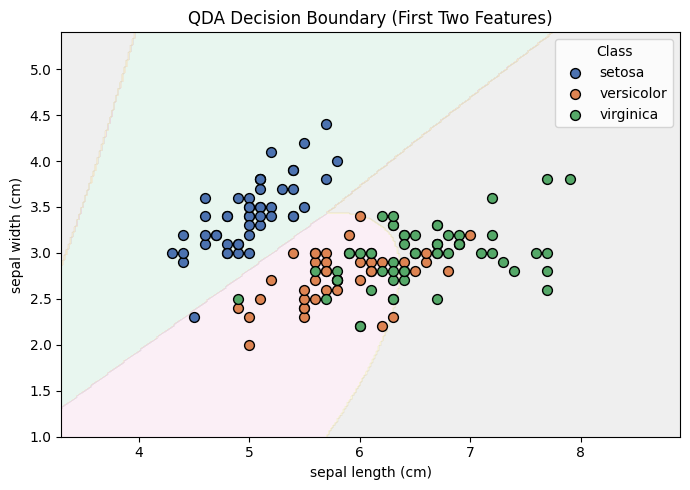

In [ ]:

# --- Quadratic Discriminant Analysis (QDA) ---
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
evaluate_model(qda, X_test, y_test, title="Quadratic Discriminant Analysis (QDA)")

# --- QDA: 2D Decision Boundary using first two features ---
def plot_qda_decision_boundary():
    X_2D = X[:, :2]
    qda_2d = QuadraticDiscriminantAnalysis()
    qda_2d.fit(X_2D, y)

    x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
    y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = qda_2d.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, preds, alpha=0.3, cmap="Pastel2")

    palette = sns.color_palette("deep", n_classes)
    for i, label in enumerate(np.unique(y)):
        plt.scatter(X_2D[y == label, 0], X_2D[y == label, 1],
                    label=class_names[label], color=palette[i], edgecolor='k', s=50)

    plt.title("QDA Decision Boundary (First Two Features)")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend(title="Class")
    plt.tight_layout()
    plt.show()


plot_qda_decision_boundary()

